In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping



In [2]:
train_path="./augmented_resized_V2/train/"

In [3]:
test_path="./augmented_resized_V2/train/"

In [4]:
val_path="./augmented_resized_V2/val/"

In [5]:
len(os.listdir(test_path))

5

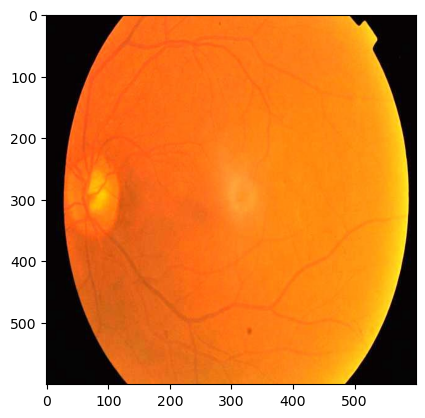

In [6]:
img = cv2.imread("./augmented_resized_V2/train/1/0024cdab0c1e-600-FA.jpg")

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

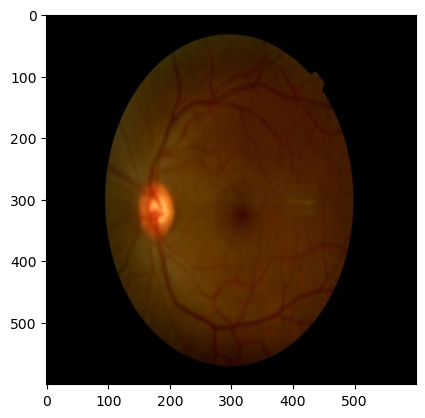

In [7]:
img = cv2.imread("./augmented_resized_V2/train/0/005b95c28852-600.jpg")

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [8]:
batch_size = 34
img_size = (150, 150)

In [9]:
train_generator = keras.utils.image_dataset_from_directory(
    directory=train_path,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    seed=42,
)



Found 115241 files belonging to 5 classes.


In [10]:
validation_generator = keras.utils.image_dataset_from_directory(
    directory=val_path,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    seed=42,
)


Found 14227 files belonging to 5 classes.


In [11]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_generator = train_generator.map(process)
validation_generator = validation_generator.map(process)

In [12]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(5,activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        256       
 chNormalization)                                                
                                                        

In [14]:
optimizer = Adam(lr=0.1) 
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(train_generator, epochs=100, validation_data=validation_generator, callbacks=[early_stopping])

Epoch 1/100



3390/3390 [==============================] - 953s 280ms/step - loss: 1.2790 - accuracy: 0.5269 - val_loss: 1.1741 - val_accuracy: 0.5642
Epoch 2/100
3390/3390 [==============================] - 953s 281ms/step - loss: 1.1124 - accuracy: 0.5780 - val_loss: 1.0855 - val_accuracy: 0.5828
Epoch 3/100
3390/3390 [==============================] - 959s 283ms/step - loss: 1.0134 - accuracy: 0.6139 - val_loss: 0.9556 - val_accuracy: 0.6558
Epoch 4/100
3390/3390 [==============================] - 972s 287ms/step - loss: 0.9310 - accuracy: 0.6474 - val_loss: 0.8815 - val_accuracy: 0.6818
Epoch 5/100
3390/3390 [==============================] - 1001s 295ms/step - loss: 0.8692 - accuracy: 0.6754 - val_loss: 0.8472 - val_accuracy: 0.6924
Epoch 6/100
3390/3390 [==============================] - 993s 293ms/step - loss: 0.8022 - accuracy: 0.7042 - val_loss: 0.8072 - val_accuracy: 0.7127
Epoch 7/100
3390/3390 [==============================] - 1000s 295ms/step - loss: 0.7408 - accuracy: 0.7269 - val_los

In [17]:
validation_accuracy = history.history['val_accuracy']
validation_accuracy

[0.5642089247703552,
 0.5827651619911194,
 0.6557953357696533,
 0.6818022131919861,
 0.6924158334732056,
 0.7126590013504028,
 0.7080902457237244,
 0.7047163844108582,
 0.680677592754364,
 0.7047163844108582,
 0.6981795430183411,
 0.7008504867553711,
 0.6962114572525024,
 0.6911506056785583,
 0.6947353482246399,
 0.686722457408905]

In [18]:
max_validation_accuracy = max(validation_accuracy)

In [19]:
max_validation_accuracy

0.7126590013504028

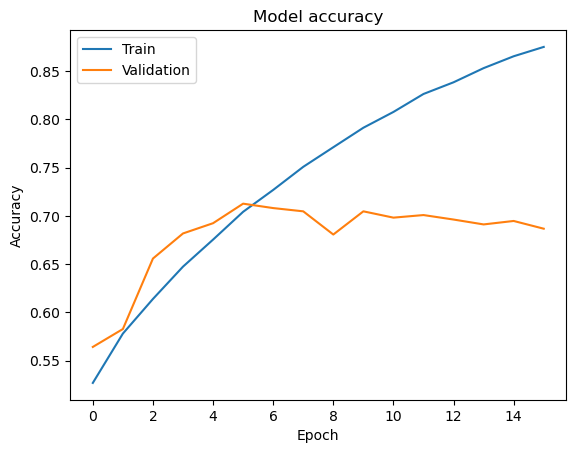

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

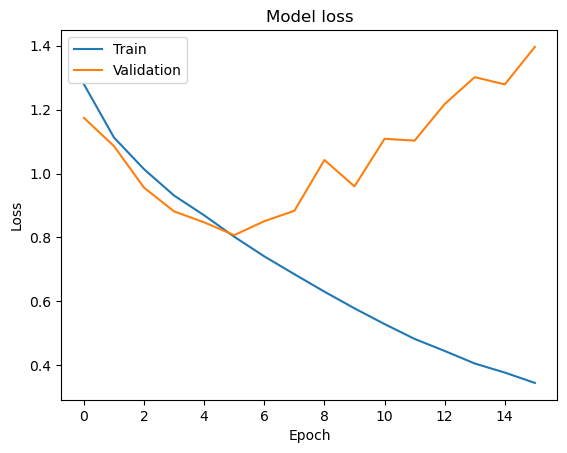

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [22]:
from keras.applications.vgg16 import VGG16


In [23]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [24]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [25]:
conv_base.trainable = False



In [27]:
model_fine = Sequential()

model_fine.add(conv_base)
model_fine.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(54,activation='relu'))
model.add(Dense(27,activation='relu'))

model_fine.add(Dense(5, activation='softmax')) 

In [28]:
optimizer = Adam(lr=0.1) 
model_fine.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
model_fine.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_14 (Dense)            (None, 5)                 40965     
                                                                 
Total params: 14755653 (56.29 MB)
Trainable params: 40965 (160.02 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [30]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_fine.fit(train_generator, epochs=100, validation_data=validation_generator, callbacks=[early_stopping])


Epoch 1/100
3390/3390 [==============================] - 4645s 1s/step - loss: 1.0897 - accuracy: 0.5917 - val_loss: 1.1409 - val_accuracy: 0.5757
Epoch 2/100
3390/3390 [==============================] - 4660s 1s/step - loss: 1.0039 - accuracy: 0.6255 - val_loss: 0.9966 - val_accuracy: 0.6285
Epoch 3/100
3390/3390 [==============================] - 4663s 1s/step - loss: 0.9748 - accuracy: 0.6354 - val_loss: 1.0635 - val_accuracy: 0.5807
Epoch 4/100
3390/3390 [==============================] - 4676s 1s/step - loss: 0.9474 - accuracy: 0.6452 - val_loss: 0.9673 - val_accuracy: 0.6477
Epoch 5/100
3390/3390 [==============================] - 4549s 1s/step - loss: 0.9301 - accuracy: 0.6511 - val_loss: 1.2267 - val_accuracy: 0.4678
Epoch 6/100
3390/3390 [==============================] - 4579s 1s/step - loss: 0.9202 - accuracy: 0.6542 - val_loss: 1.0002 - val_accuracy: 0.6344
Epoch 7/100
3390/3390 [==============================] - 4560s 1s/step - loss: 0.9098 - accuracy: 0.6581 - val_loss: 1

In [31]:
model.save("your_model.h5")

C:\Users\shadm\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
from keras.models import load_model


In [33]:
model.save("your_model.h5")

In [34]:
model_fine.save("model.h5")

C:\Users\shadm\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
